## The Dataset

Each record contain 9 numerical attributes. The 10th column is the target column. There are two classes to predict, we will call them positive and negative.

### 1. Import necessary packages

For this exercise we need
* pandas
* train_test_split
* LogisticRegression
* pyplot from matplotlib
* KNeighborsClassifier
* LogisticRegressionClassifier
* RandomForestClassifier
* DummyClassifier


In [22]:
import numpy as np
import pandas as pd
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report, roc_curve, precision_recall_curve, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

### 2. Load and prepare the dataset
* Load the training data into a dataframe named df_train_data 
* Create binary classification problem - rename some class labels
* Create a dataframe of 9 features named X, drop column 9.
* Create a data frame of labels named y, select only column 9.
* Split the data into a training set and a test set.

In [2]:
df_train_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/shuttle/shuttle.tst', header=None, sep=' ')

df_train_data.loc[df_train_data[9] != 4, 9] = 0
df_train_data.loc[df_train_data[9] == 4, 9] = 1

X = df_train_data.drop([9], axis=1)
y = df_train_data[9]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=36)

### 3. Create the model
* Instantiate a Logistic Regression classifier with a lbfgs solver.
* Fit the classifier to the data.

In [4]:
model = LogisticRegression(solver='lbfgs', penalty='none', max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 4. Calculate Accuracy
Calculate and print the accuracy of the model on the test data.

In [11]:
display(
    model.score(X_train, y_train),
    model.score(X_test, y_test)
)

0.8241379310344827

0.8255172413793104

### 5. Dummy Classifier
Use the dummy classifier to calculate the accuracy of a purely random chance.

Compare this result to the result of the logistic regression classifier above. What does this result tell you?

In [9]:
dummy = DummyClassifier(strategy='uniform')
dummy.fit(X_train, y_train)
display(
    dummy.score(X_train, y_train),
    dummy.score(X_test, y_test)
)

0.5031527093596059

0.48528735632183906

### 6. Confusion Matrix
Print the confusion matrix.

In [19]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                  columns=['pred_1', 'pred_0'],
                  index=['true_1', 'true_0']
                 )
display(cm_df)

,pred_1,pred_0
true_1,3552,136
true_0,623,39


In [20]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

### 7. Plot a nicer confusion matrix (optional)
Use the plot_confusion_matrix function from above to plot a nicer looking confusion matrix.

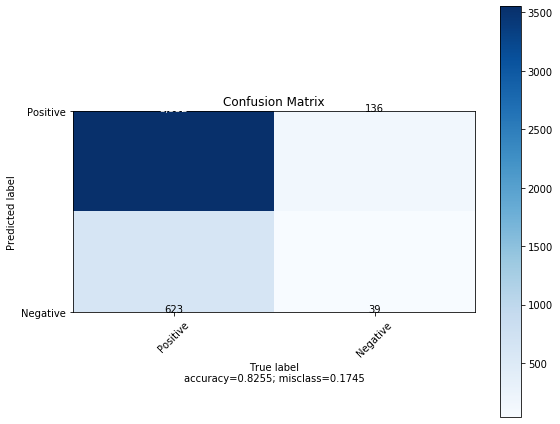

In [23]:
plot_confusion_matrix(cm=cm, target_names=['Positive', 'Negative'], title='Confusion Matrix', normalize=False)

### 8. Calculate Metrics
Print the F1, F beta, precision, recall and accuracy scores.

In [26]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
fbeta_precision = fbeta_score(y_test, y_pred, 0.5)
fbeta_recall = fbeta_score(y_test, y_pred, 2)

display(
    "Metric Scores",
    f"accuracy: {accuracy}",
    f"precision: {precision}",
    f"recall: {recall}",
    f"f1 score: {f1}",
    f"fbeta precision: {fbeta_precision}",
    f"fbeta recall: {fbeta_recall}"
)

'Metric Scores'

'accuracy: 0.8255172413793104'

'precision: 0.22285714285714286'

'recall: 0.05891238670694864'

'f1 score: 0.09318996415770608'

'fbeta precision: 0.14317180616740088'

'fbeta recall: 0.06907545164718386'

### 9. Print a classification report

In [28]:
cr = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])
print(cr)

              precision    recall  f1-score   support

    Negative       0.85      0.96      0.90      3688
    Positive       0.22      0.06      0.09       662

    accuracy                           0.83      4350
   macro avg       0.54      0.51      0.50      4350
weighted avg       0.76      0.83      0.78      4350



### 10. Plot ROC Curve and AUC
Caculate AUC and plot the curve.

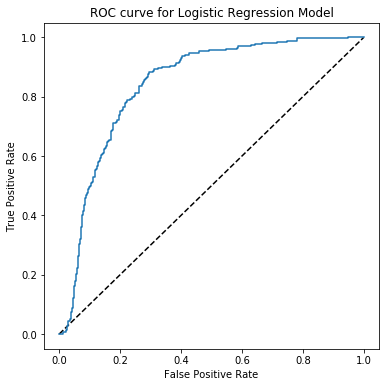

'Area under the ROC curve: 0.8404595454515665'

In [32]:
probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
fig = plt.figure(figsize = (6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression Model')
plt.show()

auc = roc_auc_score(y_test, probs)
display(f'Area under the ROC curve: {auc}')

### 11. Plot Precision-Recall Curve
Plot the precision-recall curve for the model above.

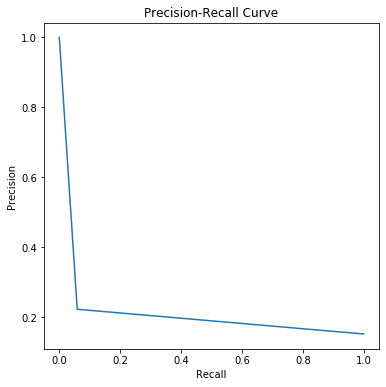

In [34]:
pres, rec, thresholds = precision_recall_curve(y_test, y_pred)
fig = plt.figure(figsize = (6, 6))
plt.plot(rec, pres)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

Find the best value for C in the Logistic Regression Classifier for avoiding overfitting. Plot the training and testing accuracy over a range of C values from 0.05 to 1.5.

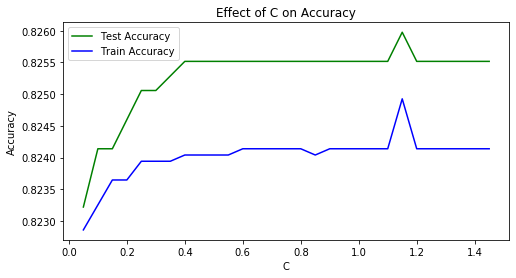

In [36]:
c_vals = np.arange(0.05, 1.5, 0.05)
test_accuracy = []
train_accuracy = []

for c in c_vals:
  model = LogisticRegression(solver='lbfgs', penalty='l2', C=c, max_iter=1000)
  model.fit(X_train, y_train)
  test_accuracy.append(model.score(X_test, y_test))
  train_accuracy.append(model.score(X_train, y_train))

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(c_vals, test_accuracy, '-g', label='Test Accuracy')
ax1.plot(c_vals, train_accuracy, '-b', label='Train Accuracy')
ax1.set(xlabel='C', ylabel='Accuracy')
ax1.set_title('Effect of C on Accuracy')
ax1.legend()
plt.show()

### 12. Cross Validation
Perform 5-fold cross validation for a Logistic Regression Classifier. Print the 5 accuracy scores and the mean validation score.

In [37]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

display(
    f'Accuracy scores for the 5 folds: {cv_scores}',
    f'Mean cross validation score: {np.mean(cv_scores)}'
)


'Accuracy scores for the 5 folds: [0.82660099 0.82019704 0.82413793 0.82216749 0.82512315]'

'Mean cross validation score: 0.8236453201970443'

### 13. Is this really linear?
Our linear classifier is not giving us accuracy better than the dummy classifier. Suppose that the data was not linearly separable? Instantiate and train a KNN model with k = 7. How does the accuracy of the KNN model compare to the Logistic Regression from above? What does that tell you about the data?


In [38]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)

display(
    model.score(X_train, y_train),
    model.score(X_test, y_test)
)

0.9991133004926108

0.9981609195402299

### 14. Random Forest
Next, instantiate and fit a RandomForestClassifier and calculate the accuracy of that model.

In [39]:
model = RandomForestClassifier(n_estimators=22, random_state=36)
model.fit(X_train,y_train)

display(
    model.score(X_train, y_train),
    model.score(X_test, y_test)
)

1.0

0.9997701149425288